# Challenge - Instagram Style Photo Collage
Instagram Style Photo Collage
Use OpenCV and Numpy to build a photo collage

In this exercise, you will build a photo collage using 5 images of pokemon as given in the dataset. The sample collage image and images to use in the collage are given in the Dataset folder.



Submission Instructions You need to resize each pokemon 200X200 before using it. The final image should have size 430 X 430 px

(10 border + 200 pokemon + 10 border + 200 pokemon + 10 border = 430 px) along row and column.

After that you need to convert the final image into a single .csv file of the shape (rows x cols, 3). Your accuracy will be based on percentage of values matched with our file. The CSV file should have a header "r,g,b" as column names.

In [33]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
#helper function
def load_and_resize(path, size=(200,200)):
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if img is None:
        raise ValueError(f"Image at {path} could not be loaded.")
    img = cv2.resize(img, size)  # High-quality downscaling
    return img

In [35]:
tl = load_and_resize('images/top_left.jpg')
tr = load_and_resize('images/top_right.jpg')
bl = load_and_resize('images/bottom_left.jpg')
br = load_and_resize('images/bottom_right.jpg')
cr = load_and_resize('images/center.jpeg')

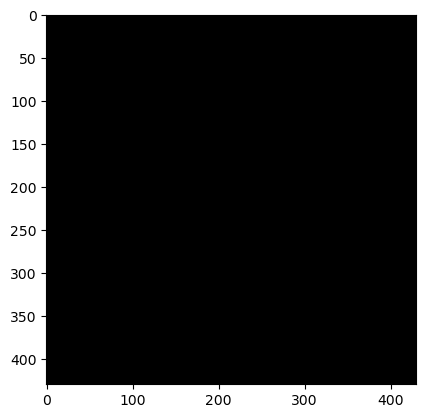

In [36]:
canvas = np.zeros((430, 430, 3), dtype=np.uint8)
plt.imshow(canvas)

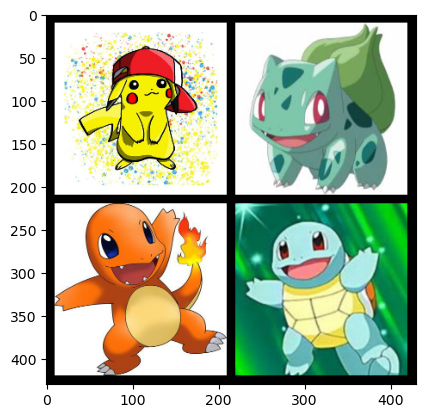

In [37]:
canvas[10:210, 10:210]   = tl
canvas[10:210, 220:420]  = tr
canvas[220:420, 10:210]  = bl
canvas[220:420, 220:420] = br

plt.imshow(canvas)

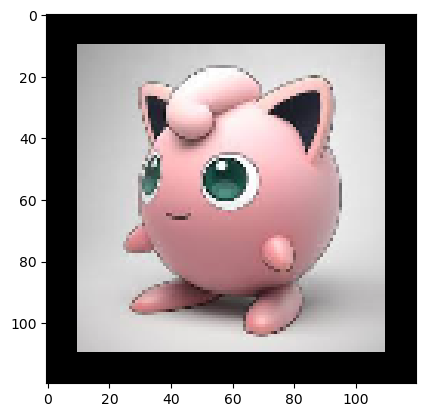

In [38]:
#center image: 100x100 + 10px border, centered
cr = load_and_resize('images/center.jpeg', size=(100, 100))
cr = cv2.copyMakeBorder(cr, 10, 10, 10, 10, cv2.BORDER_CONSTANT, value=[0, 0, 0])
plt.imshow(cr)


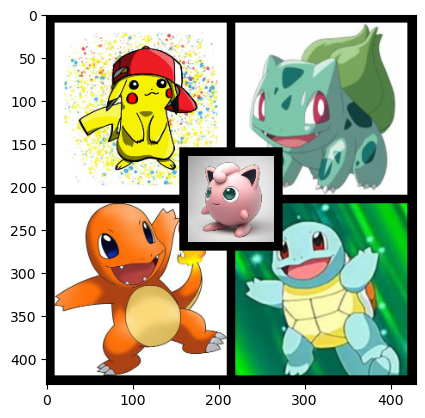

In [39]:
ch, cw = cr.shape[:2]
y0 = (430 - ch)//2
x0 = (430 - cw)//2
canvas[y0:y0+ch, x0:x0+cw] = cr

plt.imshow(canvas)


In [40]:
#Converting to CSV 
flat = canvas.reshape((-1, 3)) # Flatten to 2D
df = pd.DataFrame(flat, columns=['r', 'g', 'b'])
df.to_csv('challenge_collage_result.csv', index=False)